Problem 3

In [103]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [104]:
data = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
data = data.loc[data['Subtype'].isin(['Luminal A', 'Luminal B'])]
X = data.iloc[:, :-1].to_numpy()
y = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

0.9463087248322147
[[99  4]
 [ 4 42]]
0.9611650485436893 0.9130434782608695


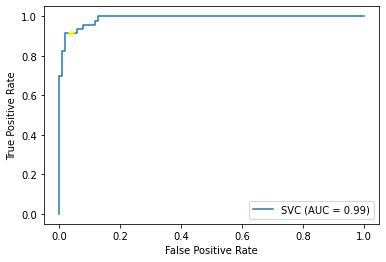

In [106]:
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")

In [107]:
data = data.iloc[:, :-1]
data.loc['coef'] = model.coef_[0]

In [108]:
genes = data.T.sort_values(['coef'], ascending=False, key=abs)

In [109]:
print(genes['coef'].head(5))

FOXC1   -1.519142
MIA     -1.301628
ORC6     1.114742
KRT17   -1.065207
UBE2T    0.773348
Name: coef, dtype: float64


In [110]:
data1 = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
data1 = data1.loc[data1['Subtype'].isin(['Luminal A', 'Luminal B']), 
                 ['FOXC1', 'MIA', 'ORC6', 'KRT17', 'UBE2T', 'Subtype']]
X = data1.iloc[:, :-1].to_numpy()
y = data1['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.8456375838926175
[[90 13]
 [10 36]]
0.8737864077669902 0.782608695652174


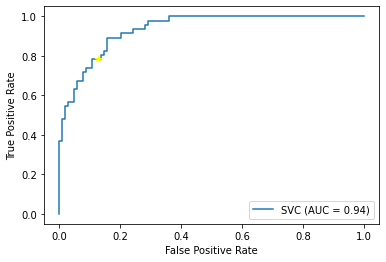

In [111]:
print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")

Problem 4

In [112]:
data = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
X = data.iloc[:, :-1].to_numpy()
y = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
model = SVC(kernel="linear", decision_function_shape='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)

0.9301310043668122
[[ 16   0   0   0   0   0]
 [  0  24   0   0   1   0]
 [  1   0 101   0   1   0]
 [  1   0   9  36   0   0]
 [  1   1   1   0   2   0]
 [  0   0   0   0   0  34]]


In [113]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
model = SVC(kernel="linear", decision_function_shape='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)

0.9082969432314411
[[11  0  1  3  1  0]
 [ 0 24  1  0  0  0]
 [ 1  0 97  4  1  0]
 [ 1  0  5 40  0  0]
 [ 0  1  1  0  3  0]
 [ 0  0  0  0  1 33]]


Problem 5

In [114]:
N = 10000
X1 = np.random.normal(loc=0, size=(N, 2))
X2 = np.random.normal(loc=10, size=(N, 2))
X_1 = np.vstack([X1, X2])
y_1 = np.array([0]*N + [1]*N)

--- 0.00605010986328125 seconds ---
1.0
[[2500    0]
 [   0 2500]]
1.0 1.0


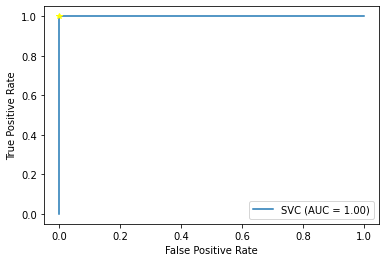

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, stratify=y_1,
                                                    random_state=13)
model = SVC(kernel="linear")
start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")

In [116]:
N = 10000
X3 = np.random.normal(loc=0, size=(N, 2))
X4 = np.random.normal(loc=0, size=(N, 2))
X_2 = np.vstack([X3, X4])
y_2 = np.array([0]*N + [1]*N)

--- 4.732409954071045 seconds ---
0.4936
[[1220 1280]
 [1252 1248]]
0.488 0.4992


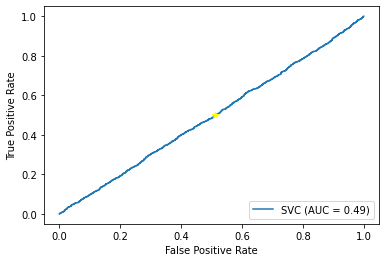

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, stratify=y_2,
                                                    random_state=13)
model = SVC(kernel="linear")
start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")